In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df = df.drop(columns=['Blood Pressure'])
df['BMI Category'] = df['BMI Category'].replace('Normal', 'Normal Weight')
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

print(df.head())
print(df.info())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level   BMI Category  \
0                 6                       42             6     Overweight   
1                 6                       60             8  Normal Weight   
2                 6                       60             8  Normal Weight   
3                 4                       30             8          Obese   
4                 4                       30             8          Obese   

   Heart Rate  Daily Steps Sleep Disorder  Systolic_BP  Diastolic_BP  
0          77         4200           None          126            83 

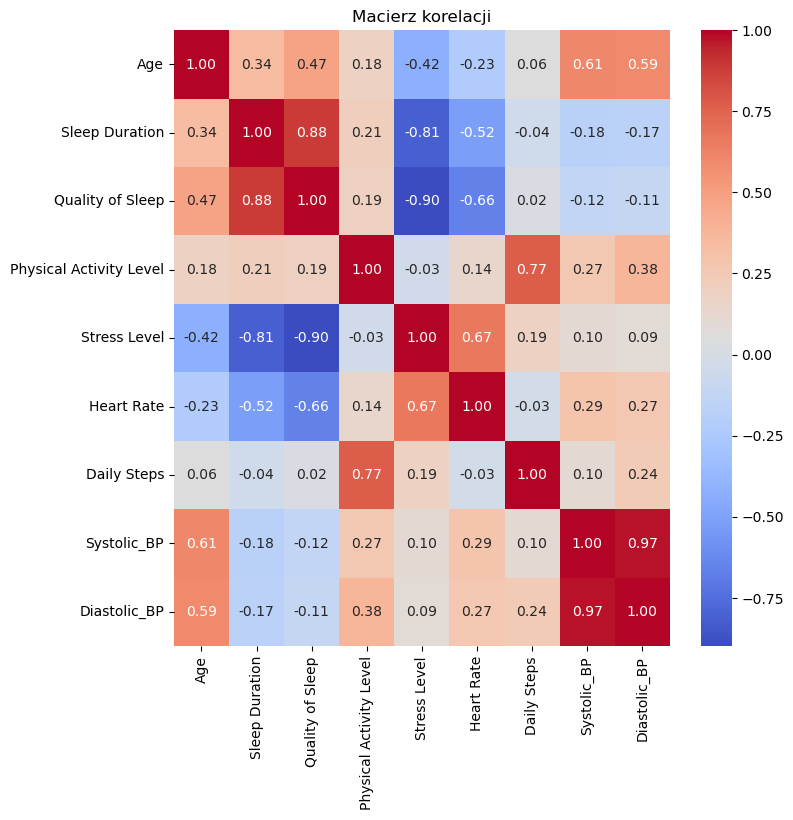

In [4]:
plt.figure(figsize=(8, 8))
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

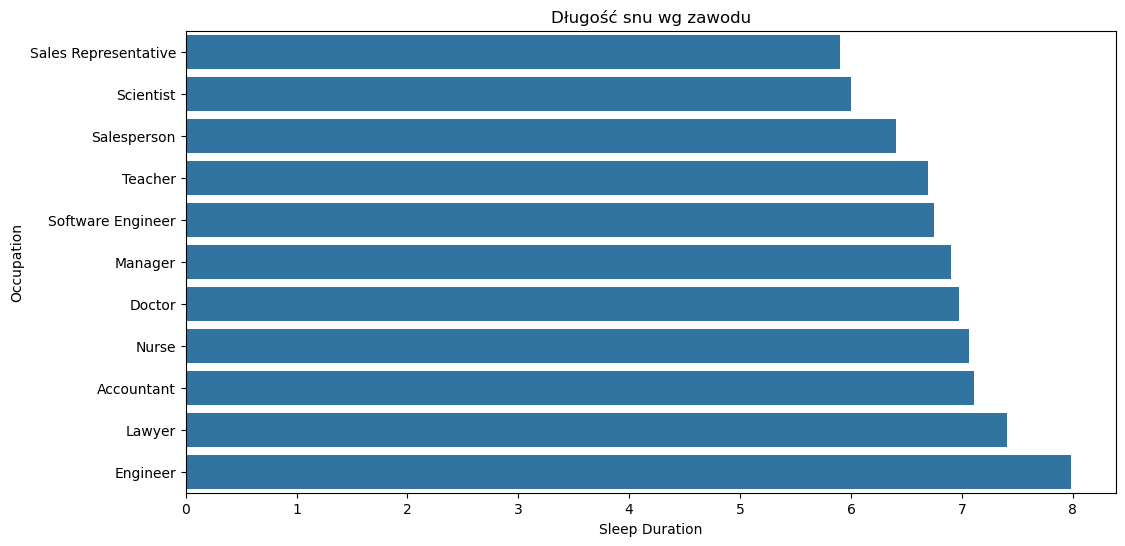

In [5]:
plt.figure(figsize=(12, 6))
order = df.groupby('Occupation')['Sleep Duration'].mean().sort_values().index
sns.barplot(x='Sleep Duration', y='Occupation', data=df, order=order, errorbar=None)
plt.title('Długość snu wg zawodu')
plt.show()

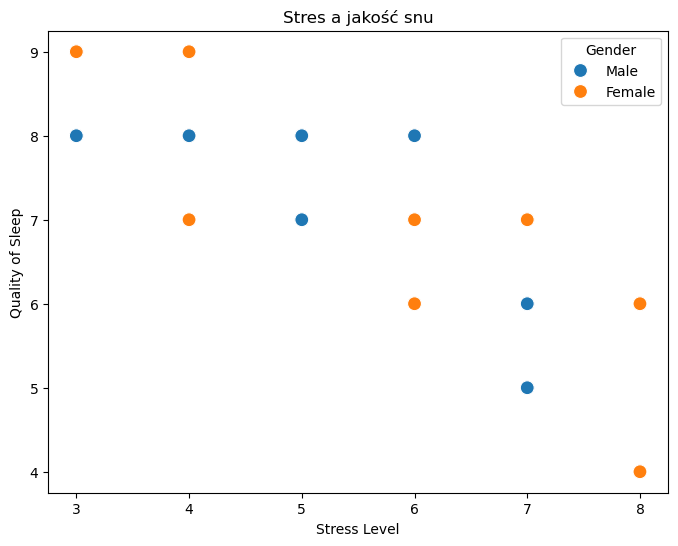

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=df, hue='Gender', s=100)
plt.title('Stres a jakość snu')
plt.show()

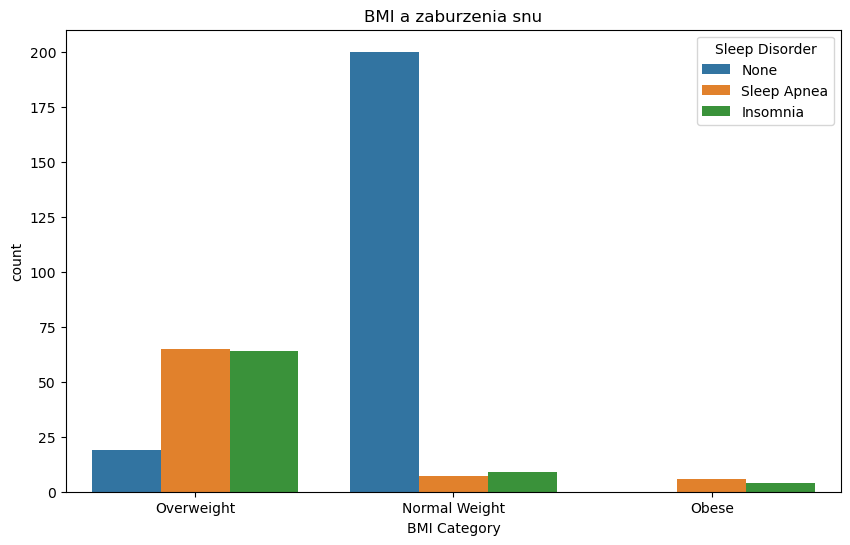

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI Category', hue='Sleep Disorder', data=df)
plt.title('BMI a zaburzenia snu')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [15]:
X = df.select_dtypes(include=['number']).drop(columns=['Person ID']) 
y = df['Sleep Disorder']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88
